# Imports

In [1]:
# Pipeline
import tensorflow as tf

# Pre Processing
from pathlib import Path
from archive.translate import translate
import torchvision.datasets as datasets
from torch.utils.data import random_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Training Model
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F


# Jupyter Notebook to Processing Pipeline

To translate a Jupyter notebook containing a functioning implementation of a machine learning model for gait analysis into a software application that can be used to apply the model to arbitrary images or videos, I will need to follow a series of steps. Here's a detailed explanation of the process I would follow:

##### 1. Understanding the Jupyter notebook and saving the wokring model to disk: 
* I will begin by thoroughly understanding the Jupyter notebook's implementation, including the underlying machine learning model, its architecture, and the data preprocessing/post-processing steps. I will make sure to have a clear understanding of the input and output requirements. This involves determining the required input dimensions, such as image size/video size, to ensure compatibility with the model, but also understanding the format of the output. 

* Assuming the machine learning model is already trained and functional, we can proceed with the assumption that it is stored on disk. In the case that the model is not yet saved and only stored in memory, we would need to save its instance from the Jupyter notebook to a disk file. Different frameworks, such as TensorFlow or PyTorch, have their own APIs and conventions for saving and loading models from disk. Here is an example on how to save models from disk using TensorFlow and PyTorch:

In [144]:
# Using Tensorflow:
def save_model(model, model_path):
    model.save(model_path)

In [145]:
# Using PyTorch:
def save_model(model, model_path):
    torch.save(model, model_path)

##### 2. Environment setup: 
I will then set up the development environment for the software application. This would typically involve installing Python and the necessary dependencies, such as deep learning frameworks (TensorFlow/PyTorch) and any additional libraries (Matplotlib, Scikit-learn) required for image or video processing.

##### 3 Code modularization: 
If needed, I will refractor the code from the Jupyter notebook into modular components which includes identifying and extracting the essential functions and classes related to the model's training, data preprocessing, and inference. I will organize them in a structured manner, following the principles of software engineering. I will perform this step to create reusable and maintainable code. 

##### 3.1 Data Preprocessing module:
When refactoring the Jupyter notebook, I will translate the data preprocessing steps into a separate module or function. This module should take care of loading images or videos, resizing, normalizing, and any other required preprocessing steps. This is done by ensuring that the preprocessing steps align with the requirements of the machine learning model we defined in the first step.

##### 3.2 Model loading module: 
I would also create a module or function to load the trained machine learning model from disk. This module should handle the loading of model weights, model architecture, and any other model-specific configuration. The specific implementation details depend on the deep learning framework we are using. Again, here is an example on how to load models from disk using TensorFlow and PyTorch:

In [146]:
# Using TensorFlow:
def load_model(model_path):
    model = tf.keras.models.load_model(model_path)
    return model

In [147]:
# Using PyTorch:
def load_model(model_path):
    model = torch.load(model_path)
    return model

##### 3.3 Postprocessing module (Optional):
Depending on the model's output and how we need to visualize, it might be needed to post-process the predictions. For example, if the objective is to recognize the identity of individuals based on their gait, the output could be a predicted label or ID corresponding to the recognized identity. Post-processing might involve mapping the predicted label or ID to a specific individual's name or information. In this case, it may be useful to have some form of visual feedback for the user, such as displaying the input image or video alongside the predicted identity to help the user verify that the model's predictions are correct. I would thus also implement the necessary functions or classes to generate these visualizations.

##### 4. Inference: 
Next, I will develop the core functionality of the software application to apply the model to the input images or videos. This will involve creating a main function that the user interface of the application can call, passing the raw image or video data. Within this function, the data preprocessing module will be invoked to preprocess the input data appropriately. After preprocessing, the loaded model will be used to obtain predictions by passing the preprocessed data through it. These predictions can then be further processed or analyzed before being returned by the main function. Here is an example of what such a function would look like:

In [148]:
# Pseudo code of the inference function
def apply_model_to_input(raw_input_data):
    # Pre-process the input data 
    preprocessed_data = preprocess_data(raw_input_data)

    # Load the model from disk
    model = load_model(model_path)

    # Pass the pre-processed data to the model and get the predictions of the model
    predictions = model.predict(preprocessed_data)

    # Post-process the predictions if needed (Optional)
    post_predictions = postprocess_predictions(predictions)

    # Return the predictions after they have been processed
    return post_predictions


##### 5. Integration and user interface:
I will then design and implement a user-friendly interface to interact with the software application. This could be a command-line interface or a graphical user interface depending on the requirements. The interface should allow users to provide input images or videos, display the results, and save or export the output as required.

##### 6. Testing and validation:
The next step in the software development process is to validate the functionality of the software application by employing appropriate test cases and sample data. This validation process is essential to ensure that the application consistently produces accurate results and handles various edge cases that may arise during its usage.

To facilitate the validation process, an agile approach can be adopted. This means that validation and testing can be performed after each step described in the development process. For instance, after implementing each individual module, I would conduct tests specific to that module to ensure its correctness and functionality. This allows for early identification and resolution of any issues or bugs within the specific module.

Once the individual modules have been tested, I would perform integration testing to evaluate the seamless integration of these modules and identify any potential conflicts or inconsistencies that may arise due to their interactions.

Following integration testing, system testing can be conducted to evaluate the overall functionality and performance of the software application as a whole.

It could be important to perform Acceptance testing and evaluate the performance of the application as well. This evaluation could include monitoring the application's runtimes to ensure efficient processing. Additionally, it would involve verifying whether the application can effectively handle long videos or large images without encountering any issues or performance degradation.

##### 7. Deployment:
I would then prepare the software application for deployment. This might involve packaging the application as an executable or creating a distributable package for easy installation. I would document the necessary installation steps, dependencies, and usage instructions.

##### 8. Documentation: 
As a last step, I would document the application to provide a clear explanation of its functionality, input/output specifications, dependencies, and any relevant usage examples. 

# Demo

In this demonstration, we will train a PyTorch model using the Animals-10 dataset available at https://www.kaggle.com/datasets/alessiocorrado99/animals10. The objective is to develop a model capable of automatically identifying the animal depicted in an input image.

## Pre-Processing Data

We start by visualizing the distribution of each class. We thus plot the distribution in a bar chart.

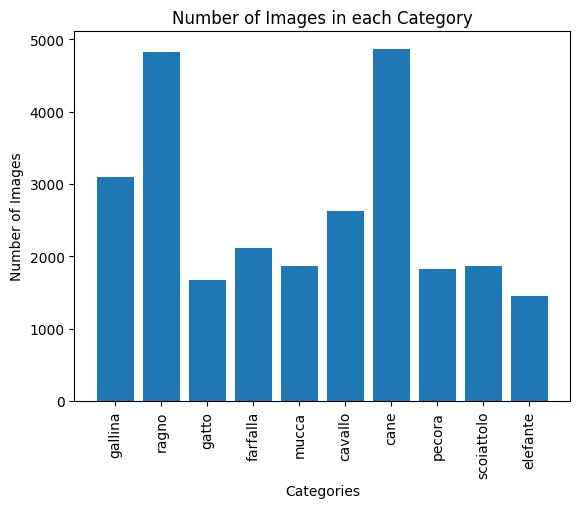

In [23]:
path = Path("archive/raw-img")

categories = []
num_images = []

# Iterate through all image directories
for item in path.iterdir():
    if item.is_dir():  # Check if item is a directory
        # get the category name and translate it to english from italian
        category_name = item.name 
        if category_name in translate:
            category_name = translate[category_name]
        categories.append(category_name)
        num_images.append(len(list(item.iterdir())))

# Plotting the histogram
plt.bar(categories, num_images)
plt.xlabel("Categories")
plt.ylabel("Number of Images")
plt.title("Number of Images in each Category")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

We then create the test, training and validation sets.

In [4]:
# Define the transformations to apply to the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
dataset = datasets.ImageFolder('./archive/raw-img', transform = transform)

In [5]:
# Define the train-test split ratio
train_ratio = 0.8
valid_ratio = 0.1
test_ratio = 0.1
total_size = len(dataset)
train_size = int(train_ratio * total_size)
valid_size = int(valid_ratio * total_size)
test_size = total_size - train_size - valid_size

# Split the dataset into train, validation, and test sets
train_set, valid_set, test_set = random_split(dataset, [train_size, valid_size, test_size])


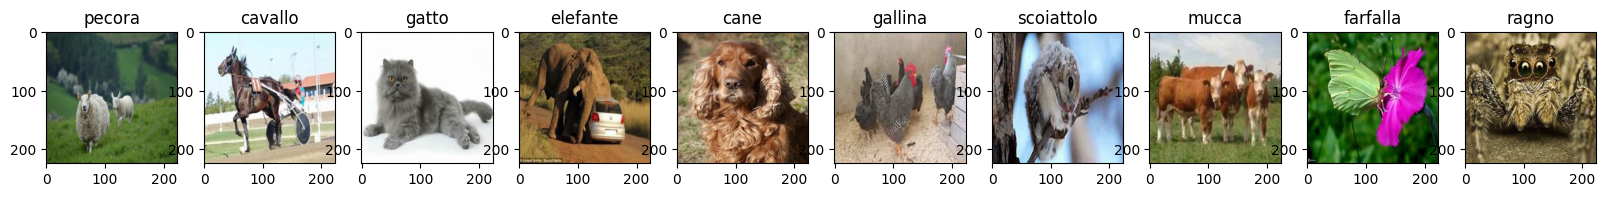

In [41]:
# Define a function to convert a tensor image to a PIL image, so that we can plot it using matplotlib
def imshow(img_tensor):
    # Convert from tensor to PIL image
    img = transforms.ToPILImage()(img_tensor.cpu())
    return img

# Get the list of class names
class_names = train_set.dataset.classes
num_classes = len(class_names)

# Create a list to store one image of each category
samples = []
category_found = [False] * num_classes

for data, label in train_set:
    if not category_found[label]:
        samples.append((data, label))
        category_found[label] = True

    if all(category_found):
        break

# Plot the samples
fig, axs = plt.subplots(1, num_classes, figsize=(20, 2*num_classes))
for i in range(num_classes):
    axs[i].imshow(imshow(samples[i][0]))
    axs[i].set_title(class_names[samples[i][1]])
plt.show()

Plot the distribution of each set to check if the distribution are appropriate (all sets have pretty similar distributions).

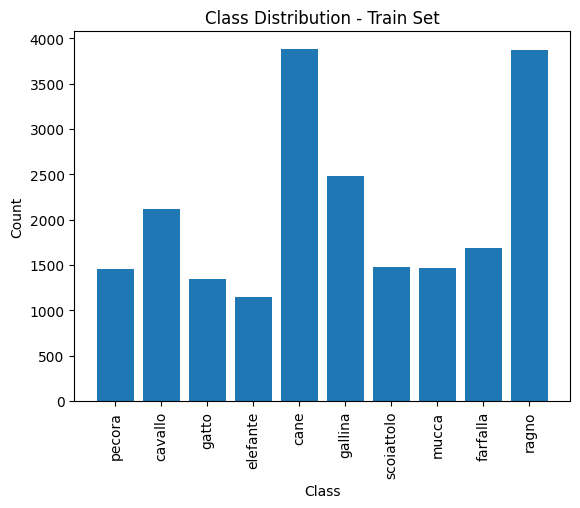

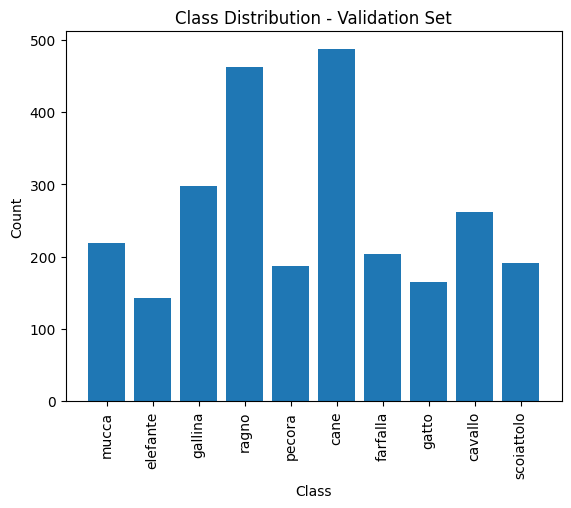

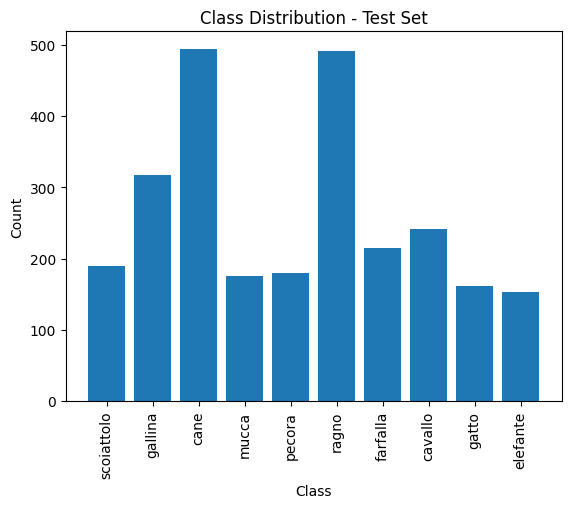

In [45]:
def plot_class_distribution(dataset, set_name):
    names = []
    name_appended = [False] * num_classes

    class_counts = {}
    for _, label in dataset:
        class_counts[label] = class_counts.get(label, 0) + 1
        if name_appended[label] == False:
            names.append(class_names[label])
            name_appended[label] = True
    
    counts = list(class_counts.values())
    
    plt.bar(names, counts)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title(f'Class Distribution - {set_name} Set')
    plt.xticks(rotation=90)
    plt.show()

# Plot class distribution for train set
plot_class_distribution(train_set, 'Train')

# Plot class distribution for validation set
plot_class_distribution(valid_set, 'Validation')

# Plot class distribution for test set
plot_class_distribution(test_set, 'Test')

## Training

In [7]:
# Define the model
class AnimalClassifier(nn.Module):
    def __init__(self, num_classes):
        super(AnimalClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        self.fc1 = nn.Linear(64 * 56 * 56, 512)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = x.view(-1, 64 * 56 * 56)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

In [8]:
# Check PyTorch has access to MPS (Metal Performance Shader, Apple's GPU architecture)
print(f"Is MPS (Metal Performance Shader) built? {torch.backends.mps.is_built()}")
print(f"Is MPS available? {torch.backends.mps.is_available()}")

# Set the device
device = "mps" if torch.backends.mps.is_available() else "cpu"
device = torch.device(device)
print(f"Using device: {device}")

Is MPS (Metal Performance Shader) built? True
Is MPS available? True
Using device: mps


In [11]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Define hyperparameters
num_epochs = 10
# Set the batch size
batch_size = 128
# Set the learning rate
learning_rate = 0.001

# Create data loaders for train, validation, and test sets
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

# Create the model instance
model = AnimalClassifier(num_classes=len(categories))
model.to(device)
print(model)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

AnimalClassifier(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=200704, out_features=512, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


Epoch [1/10], Step [10/164], Loss: 2.2804
Epoch [1/10], Step [20/164], Loss: 2.0923
Epoch [1/10], Step [30/164], Loss: 1.9284
Epoch [1/10], Step [40/164], Loss: 2.0006
Epoch [1/10], Step [50/164], Loss: 1.7310
Epoch [1/10], Step [60/164], Loss: 1.7986
Epoch [1/10], Step [70/164], Loss: 1.8457
Epoch [1/10], Step [80/164], Loss: 1.7379
Epoch [1/10], Step [90/164], Loss: 1.7066
Epoch [1/10], Step [100/164], Loss: 1.5796
Epoch [1/10], Step [110/164], Loss: 1.6141
Epoch [1/10], Step [120/164], Loss: 1.6052
Epoch [1/10], Step [130/164], Loss: 1.5898
Epoch [1/10], Step [140/164], Loss: 1.5858
Epoch [1/10], Step [150/164], Loss: 1.3889
Epoch [1/10], Step [160/164], Loss: 1.4899
Epoch [1/10], Training Loss: 1.9324, Training Accuracy: 37.63%, Validation Loss: 1.5227, Validation Accuracy: 47.92%
Epoch [2/10], Step [10/164], Loss: 1.3415
Epoch [2/10], Step [20/164], Loss: 1.2966
Epoch [2/10], Step [30/164], Loss: 1.3776
Epoch [2/10], Step [40/164], Loss: 1.3461
Epoch [2/10], Step [50/164], Loss: 1

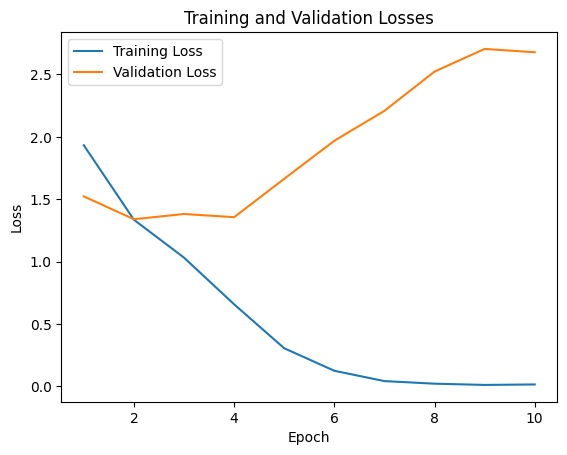

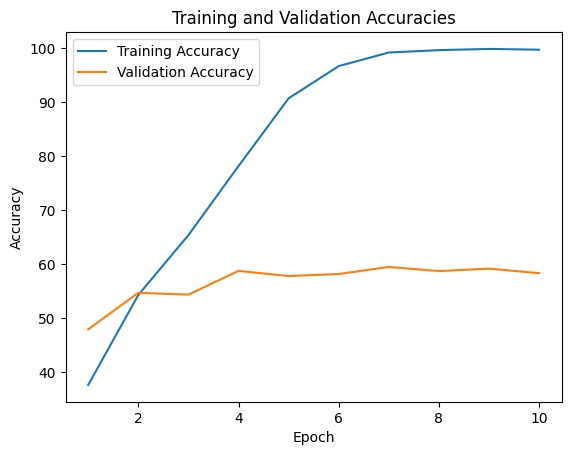

In [12]:
total_step = len(train_loader)
train_losses = []
train_accs = []
valid_losses = []
valid_accs = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    train_loss = 0.0
    correct = 0
    total = 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)


        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if (i + 1) % 10 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

    # Calculate training accuracy and loss
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss / len(train_loader))
    train_accs.append(train_accuracy)

    model.eval()  # Set the model to evaluation mode
    valid_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in valid_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate validation accuracy and loss
    valid_accuracy = 100 * correct / total
    valid_losses.append(valid_loss / len(valid_loader))
    valid_accs.append(valid_accuracy)

    print('Epoch [{}/{}], Training Loss: {:.4f}, Training Accuracy: {:.2f}%, '
          'Validation Loss: {:.4f}, Validation Accuracy: {:.2f}%'
          .format(epoch + 1, num_epochs, train_losses[-1], train_accs[-1], valid_losses[-1], valid_accs[-1]))

# Plot the training and validation losses
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# Plot the training and validation accuracies
plt.plot(range(1, num_epochs + 1), train_accs, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), valid_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()


## Testing the performance

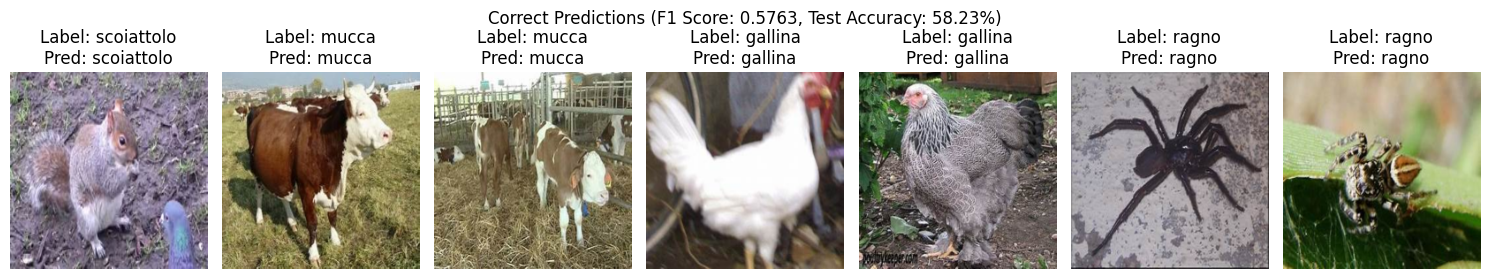

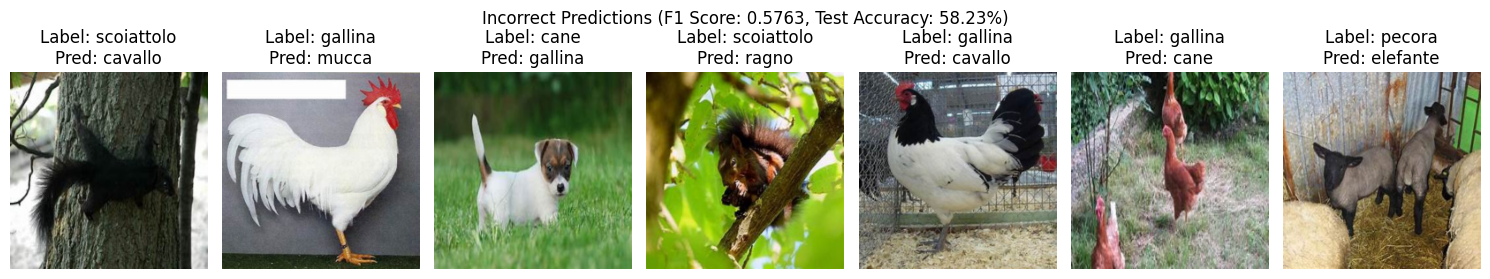

In [49]:
# Set model to evaluation mode
model.eval()

correct = 0
total = 0
num_classes = len(categories)
confusion_matrix = torch.zeros(num_classes, num_classes)

# Create lists to store correct and incorrect samples
correct_samples = []
incorrect_samples = []

# No gradient calculation is needed during evaluation
with torch.no_grad():    
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Get the predicted class
        _, predicted = torch.max(outputs, 1)

        # Update the count of total and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Update the confusion matrix
        for t, p in zip(labels.view(-1), predicted.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1

        for i in range(len(inputs)):
            if predicted[i] == labels[i]:
                correct_samples.append((inputs[i], labels[i], predicted[i]))
            else:
                incorrect_samples.append((inputs[i], labels[i], predicted[i]))

# Calculate precision, recall, and F1 score
precision = torch.diag(confusion_matrix) / confusion_matrix.sum(dim=1)
recall = torch.diag(confusion_matrix) / confusion_matrix.sum(dim=0)
f1 = 2 * precision * recall / (precision + recall)
weighted_f1 = f1 * confusion_matrix.sum(dim=1) / confusion_matrix.sum()

# Calculate the weighted average F1 score
avg_f1 = weighted_f1.sum().item()

# Function to plot samples
def plot_samples(samples, title):
    num_samples = len(samples)
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    fig.suptitle(f"{title} (F1 Score: {avg_f1:.4f}, Test Accuracy: {accuracy:.2f}%)")

    for i, (image, label, pred) in enumerate(samples):
        axes[i].imshow(imshow(image))
        axes[i].set_title(f"Label: {class_names[label.item()]}\nPred: {class_names[pred.item()]}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Calculate accuracy
accuracy = 100 * correct / total

# Plot some correct samples
plot_samples(correct_samples[:7], "Correct Predictions")

# Plot some incorrect samples
plot_samples(incorrect_samples[:7], "Incorrect Predictions")


## Note:

I dedicated approximately one hour to writing the processing pipeline description, followed by approximately three hours and ten minutes to develop this demo, bringing the total time invested to around 4h10min. It's worth noting that the demo indicates clear signs of the model overfitting the training data. To address this issue, the next step would involve hyperparameterizing the model parameters and comparing the resulting models. Additionally, I would explore the potential of leveraging pre-trained models such as VGG-16 to enhance the model's performance and generalization.